In [1]:
import sys
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))
sys.path.append('./../../RoboPoint/')

from robopoint_utils import load_model, get_coordinates, generate_prompt, do_inference_with_logits, calculate_probs_per_coordinate
from utils import extract_all, plot_scatter, calculate_euclidian_distance, visualize_points_on_image, close_all_images

2025-01-19 13:40:00.455357: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-19 13:40:01.273847: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-19 13:40:01.273883: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-19 13:40:01.273914: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-19 13:40:01.431568: I tensorflow/core/platform/cpu_feature_g

In [2]:
model_name = "wentao-yuan/robopoint-v1-vicuna-v1.5-13b"
model, processor, tokenizer = load_model(model_name)

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Some weights of the model checkpoint at wentao-yuan/robopoint-v1-vicuna-v1.5-13b were not used when initializing LlavaLlamaForCausalLM: ['model.vision_tower.vision_tower.vision_model.embeddings.class_embedding', 'model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.weight', 'model.vision_tower.vision_tower.vision_model.embeddings.position_embedding.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc2.bias', 'model.vision_tower.vision_tower.vision_model.encoder

Task: 1
Move the can from the top left of the burner to the bottom left of the burner


/home/kit/stud/uutqh/.local/lib/python3.9/site-packages/transformers/generation/utils.py:1493: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed in v5. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
From v4.47 onwards, when a model cache is to be returned, `generate` will return a `Cache` instance instead by default (as opposed to the legacy tuple of tuples format). If you want to keep returning the legacy format, please set `return_legacy_cache=True`.


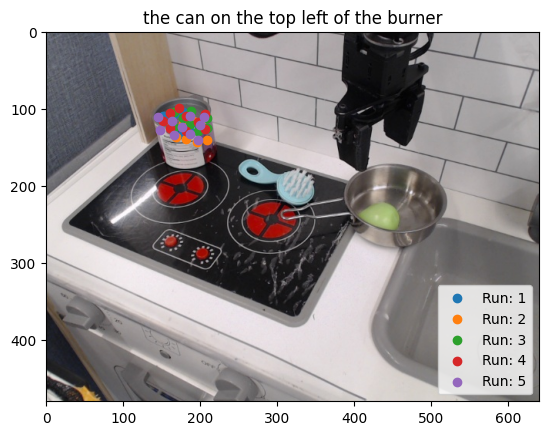

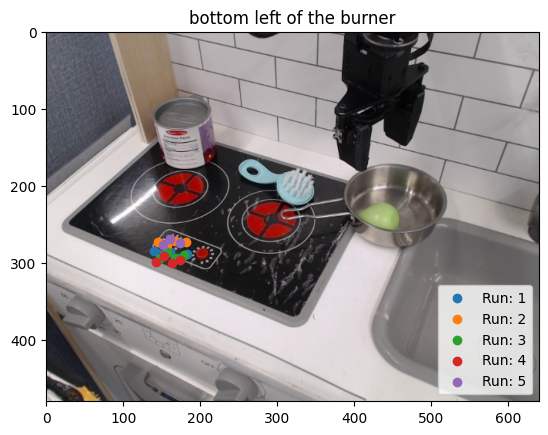

Task: 2
pick up red srewdriver


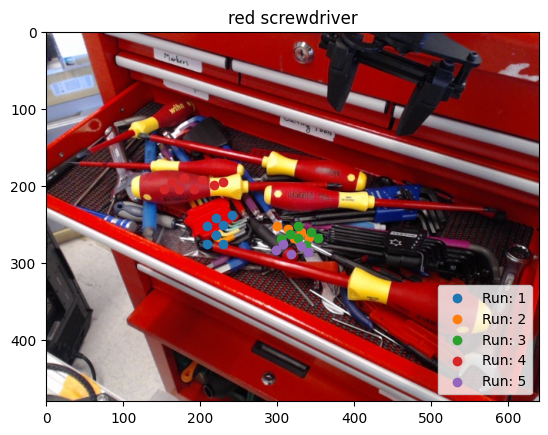

Task: 3
take the broccoli and put it between the two right burners


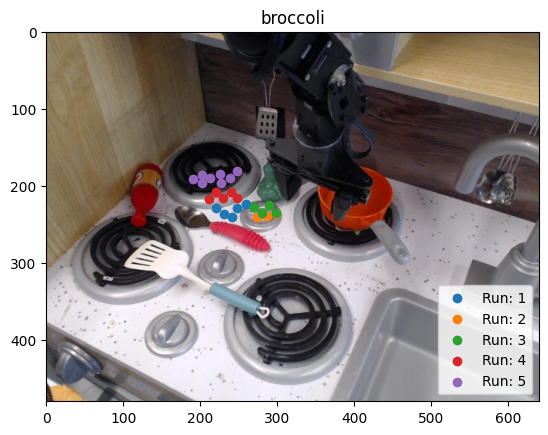

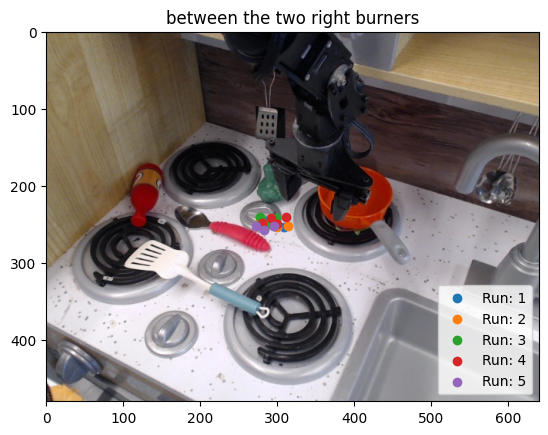

Task: 4
move arch on the table and place it on top of another arch


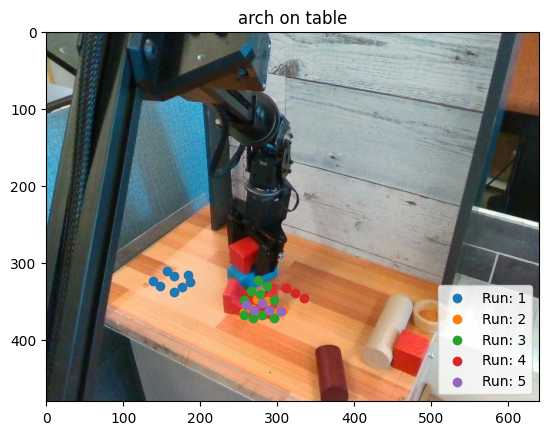

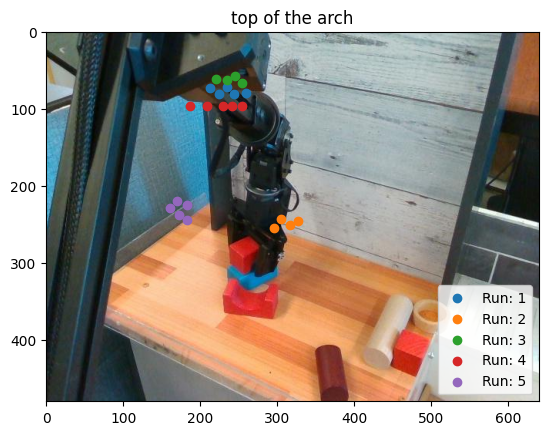

Task: 5
take sushi out of pan


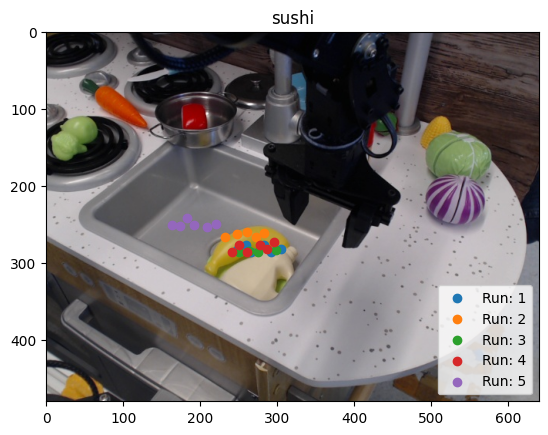

Task: 6
pick up glass cup


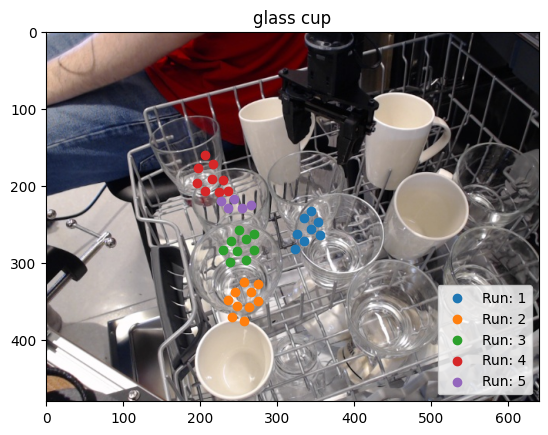

Task: 7
open low fridge


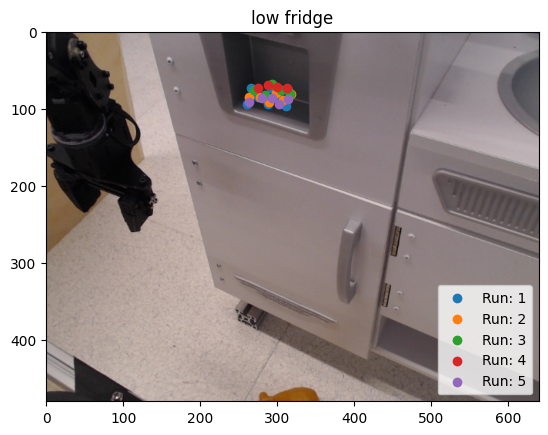

Task: 8
Place the pot to the right of the blue fork.


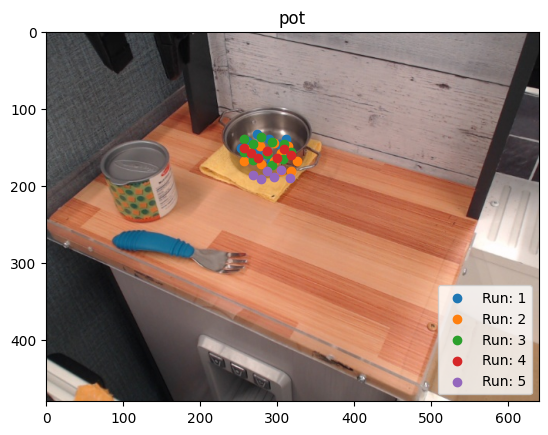

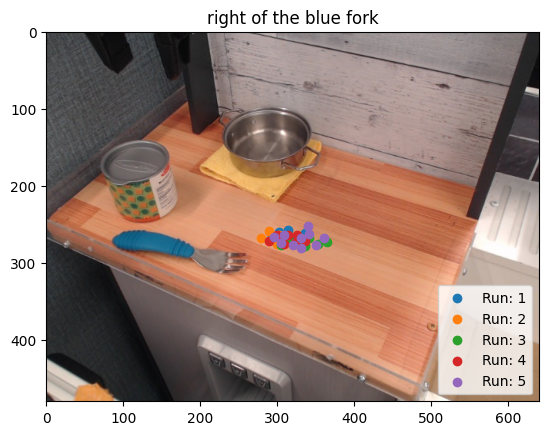

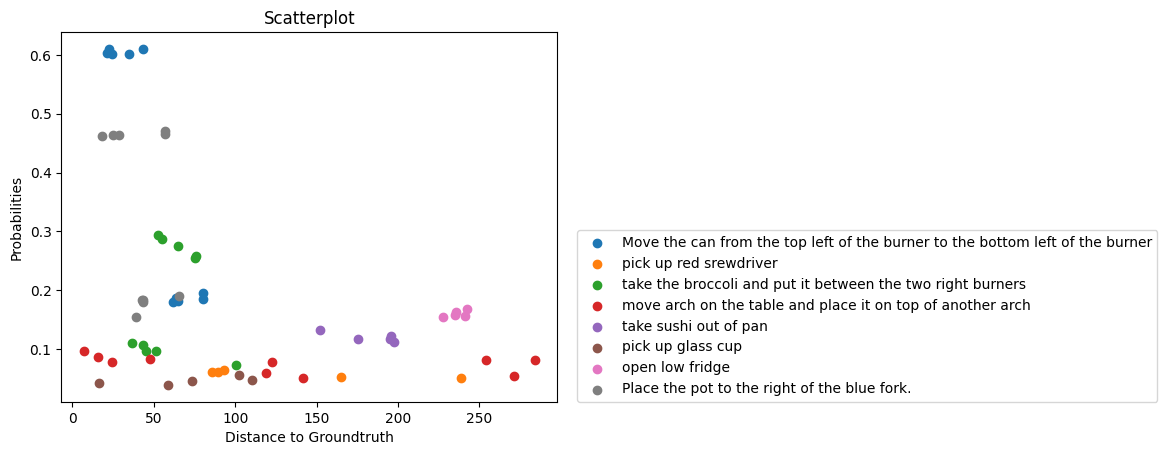

In [6]:
tasks, images, ground_truths, object_list = extract_all("../data/first_experiments")

NUMBER_OF_RUNS = 5

labels = []
list_of_distances = []
list_of_probs = []
for i in range(len(tasks)):
    print(f"Task: {i + 1}")
    print(tasks[i])

    image_path = images[i]
    task = tasks[i]
    objects = object_list[i]
    groundtruths = ground_truths[i]

    distances = []
    probs = []
    with Image.open(image_path) as image:
        width, height = image.size
        for object, groundtruth in zip(objects, groundtruths):
            image_labels = []
            image_coordinate_list = []
            prompt = generate_prompt(object, "Locate several points within the space of the ")
            for j in range(NUMBER_OF_RUNS):
                generated_text, outputs = do_inference_with_logits(image, prompt, model, processor, tokenizer, 0.2)
                coordinates = get_coordinates(generated_text, width, height)
                first_prob = calculate_probs_per_coordinate(outputs, True)[0].item()
                distance = calculate_euclidian_distance(coordinates[0], groundtruth)
        
                image_coordinate_list.append(coordinates)
                image_labels.append(f"Run: {j + 1}")
        
                distances.append(distance)
                probs.append(first_prob)
            
                #print(f"Run: {j + 1} - Output: {generated_text}")
                
            visualize_points_on_image(image, image_labels, image_coordinate_list, object)
            
    list_of_distances.append(distances)
    list_of_probs.append(probs)
    labels.append(task)
            
plot_scatter(labels, list_of_probs, list_of_distances)

In [7]:
close_all_images("../data/first_experiments")

Found and closed 16 images.
